In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")
df = df[['Sample','shannon_index_TCR','clonality_TCR','repertoire_type','tissue_type','class']]
df.drop_duplicates(keep='first', inplace=True)
df

,Sample,shannon_index_TCR,clonality_TCR,repertoire_type,tissue_type,class
0,SRR5233637,7.712411,0.246692,high_SDI,T_cell_poor,T_cell_poor_high_SDI
4,SRR5233639,10.059157,0.176850,high_SDI,T_cell_rich,T_cell_rich_high_SDI
8,sample01,1.072675,0.866028,low_SDI,T_cell_rich,T_cell_rich_low_SDI
12,sample02,1.001202,0.876088,low_SDI,T_cell_rich,T_cell_rich_low_SDI
16,sample03,0.960516,0.892663,low_SDI,T_cell_rich,T_cell_rich_low_SDI
20,sample04,9.598323,0.058640,high_SDI,T_cell_rich,T_cell_rich_high_SDI
24,sample05,8.005115,0.069339,high_SDI,T_cell_rich,T_cell_rich_high_SDI
28,sample06,8.172351,0.106218,high_SDI,T_cell_poor,T_cell_poor_high_SDI
32,sample08,8.035551,0.150633,high_SDI,T_cell_poor,T_cell_poor_high_SDI
36,sample09,7.651713,0.223424,high_SDI,T_cell_poor,T_cell_poor_high_SDI


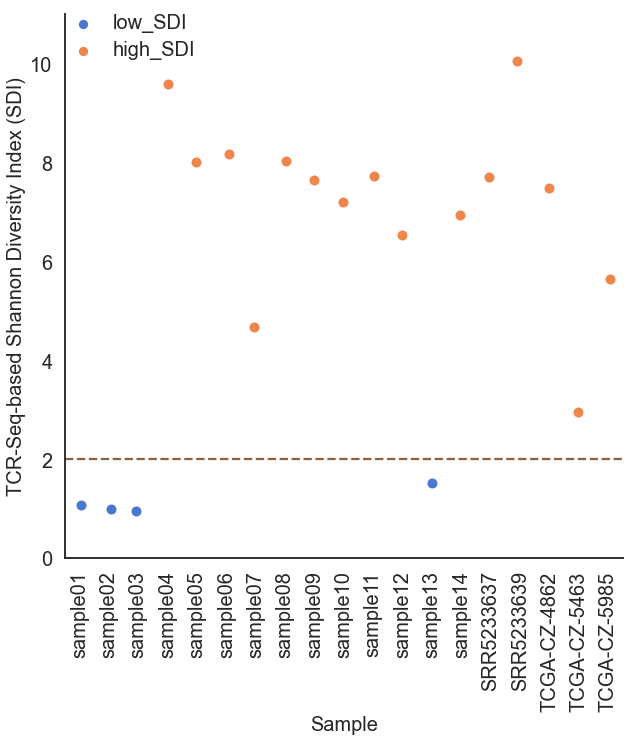

In [4]:
f, ax = plt.subplots(figsize=(10,10))

g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.stripplot(x='Sample', y='shannon_index_TCR', hue='repertoire_type', data=df, s=10,
                    order=['sample01','sample02','sample03','sample04','sample05','sample06','sample07','sample08',
                          'sample09','sample10','sample11','sample12','sample13','sample14','SRR5233637','SRR5233639',
                          'TCGA-CZ-4862','TCGA-CZ-5463','TCGA-CZ-5985'], hue_order = ['low_SDI','high_SDI'], palette="muted")
ax.axhline(y=2, color='#8c613c',ls='--')
plt.ylim(0, 11)

handles, labels = ax.get_legend_handles_labels()
plt.legend(loc='upper right', bbox_to_anchor=(0.26, 1.03), frameon=False)

g.set_xlabel("Sample",fontsize=20)
g.set_ylabel("TCR-Seq-based Shannon Diversity Index (SDI)",fontsize=20)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS2a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS2a.png",bbox_inches="tight")

plt.show()

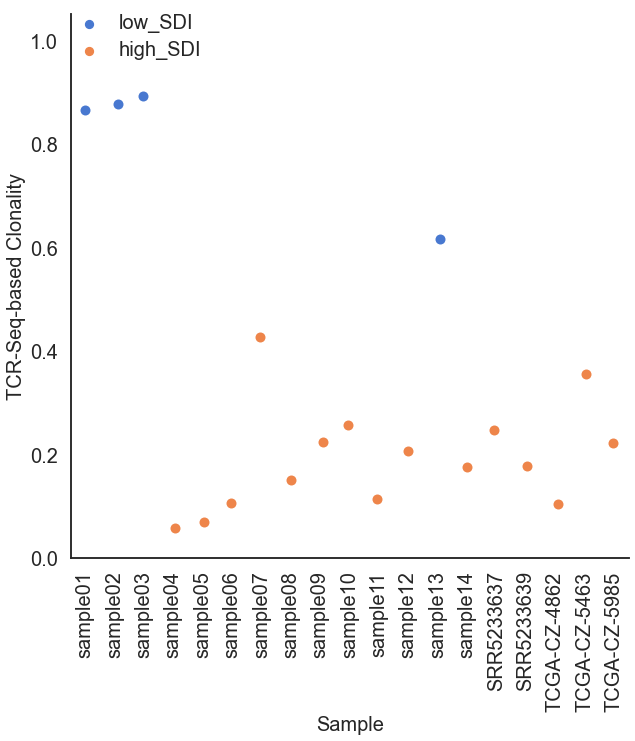

In [5]:
f, ax = plt.subplots(figsize=(10,10))

g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.stripplot(x='Sample', y='clonality_TCR', hue='repertoire_type', data=df, s=10,
                    order=['sample01','sample02','sample03','sample04','sample05','sample06','sample07','sample08',
                          'sample09','sample10','sample11','sample12','sample13','sample14','SRR5233637','SRR5233639',
                          'TCGA-CZ-4862','TCGA-CZ-5463','TCGA-CZ-5985'], hue_order = ['low_SDI','high_SDI'], palette="muted")
plt.ylim(0, 1.05)

handles, labels = ax.get_legend_handles_labels()
plt.legend(loc='upper right', bbox_to_anchor=(0.26, 1.03), frameon=False)

g.set_xlabel("Sample",fontsize=20)
g.set_ylabel("TCR-Seq-based Clonality",fontsize=20)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS2b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS2b.png",bbox_inches="tight")

plt.show()

In [6]:
df_T_cell = pd.read_csv("../summary_data/original/T_cell_fraction_predictions.tsv", sep='\t')
df_T_cell = df_T_cell[['Cell_Type','Total_T_cells']]
df_T_cell = df_T_cell.rename(columns={'Cell_Type': 'Sample'})
sample_type = df[['Sample','tissue_type']]
df_T_cell = pd.merge(df_T_cell, sample_type, how='inner', on=['Sample'])

df_T_cell

,Sample,Total_T_cells,tissue_type
0,SRR5233637,0.000000,T_cell_poor
1,SRR5233639,0.104782,T_cell_rich
2,TCGA-CZ-4862,0.000000,T_cell_poor
3,TCGA-CZ-5463,0.000000,T_cell_poor
4,TCGA-CZ-5985,0.000000,T_cell_poor
5,sample01,0.262655,T_cell_rich
6,sample02,0.322321,T_cell_rich
7,sample03,0.208908,T_cell_rich
8,sample04,0.183945,T_cell_rich
9,sample05,0.148978,T_cell_rich


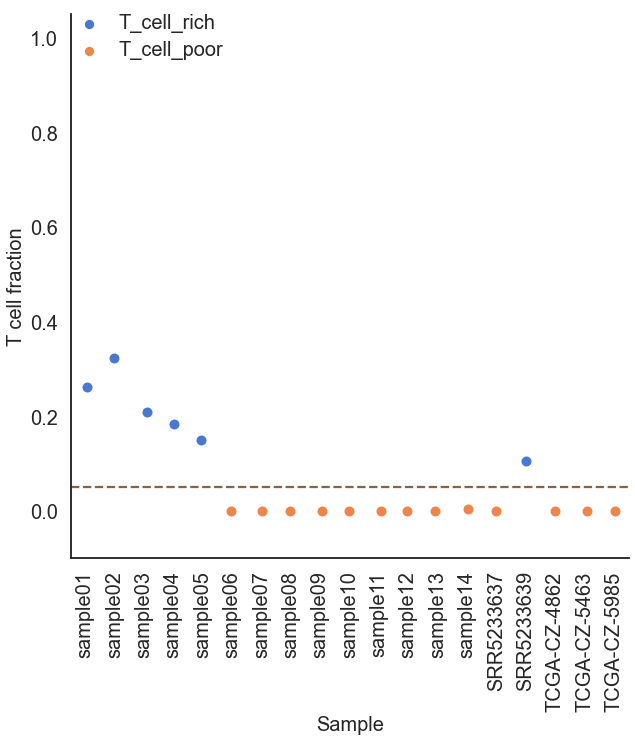

In [7]:
f, ax = plt.subplots(figsize=(10,10))

g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.stripplot(x='Sample', y='Total_T_cells', hue='tissue_type', data=df_T_cell, s=10,
                    order=['sample01','sample02','sample03','sample04','sample05','sample06','sample07','sample08',
                          'sample09','sample10','sample11','sample12','sample13','sample14','SRR5233637','SRR5233639',
                          'TCGA-CZ-4862','TCGA-CZ-5463','TCGA-CZ-5985'], hue_order = ['T_cell_rich','T_cell_poor'], palette="muted")
ax.axhline(y=0.05, color='#8c613c',ls='--')
plt.ylim(-0.1, 1.05)

handles, labels = ax.get_legend_handles_labels()
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 1.03), frameon=False)

g.set_xlabel("Sample",fontsize=20)
g.set_ylabel("T cell fraction",fontsize=20)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS2c.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS2c.png",bbox_inches="tight")

plt.show()